In [1]:
import numpy as np

In [2]:
def sigmoid_activation(x):
    return 1.0/(1 + np.exp(-x))

def sigmoid_activation_der(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

In [3]:
np.random.seed(123456)

# FeedFoward : Propagacion hacia adelante
def prediccion(x, w1, w2, bias = 1):
    c1 = sigmoid_activation(x.dot(w1) + bias)
    return sigmoid_activation(c1.dot(w2) + bias)

def entrenamiento(entradas, salidas, neuronas, iteraciones, taza_aprendizaje):
    
    w1 = np.random.rand(entradas.shape[1], neuronas)
    w2 = np.random.rand(neuronas,salidas.shape[1])
    
    errores = []
    for iteracion in range(iteraciones):
        
        for entrada, salida in zip(entradas, salidas):
            
            
            #documentacion red neuronal
            #https://www.youtube.com/watch?v=262XJe2I2D0&t=40s
            
            #forward
            l0 = entrada
            l1 = sigmoid_activation(np.dot(l0, w1) + bias)
            l2 = sigmoid_activation(np.dot(l1, w2) + bias)
            
            #backpropagation
            l2_error = -2*(l2-salida)
            
            #calcular deltas
            l2_delta = np.multiply(l2_error,sigmoid_activation_der(l2.A1))
            l1_error = np.dot(l2_delta, w2.T)
            l1_delta = np.multiply(l1_error,sigmoid_activation_der(l1.A1))
            
            #actualizar pesos
            w2 = w2 + 0.3*np.dot(l1.T, l2_delta)
            w1 = w1 + 0.3*np.dot(l0.T, l1_delta)
            
        #Probando - calculando error
        errores.append(np.square(np.subtract(prediccion(entradas, w1, w2), salidas)).mean(axis=0).A1)

        if(np.square(np.subtract(prediccion(entradas, w1, w2), salidas)).mean(axis=0).A1[0] < 0.01):
            break

    return w1, w2, errores

In [4]:
entradas = np.matrix([[1, 1], [0, 0], [0, 1], [1, 0]])

# Salidas - Compuertas logicas
salidasAND = np.matrix([[1, 0, 0, 0]]).T

In [5]:
# Entrenando
w1_AND, w2_AND, error_AND = entrenamiento(entradas, salidasAND, 10, 300, 0.1)

# Funcion para mostrar tablas de resultados
def predecirFinal(titulo, entradas, salidas, w1, w2):
    print("\nPrediciendo compuerta "+titulo)
    print("\nEntrada\t\tSalida\t\tSalida Esperada")
    print("-"*50)
    for entrada, salida in zip(entradas, salidas):
        try:
            print("{} \t\t  {}\t\t\t{}".format(entrada.A1, int(np.rint(prediccion(entrada, w1, w2))), salida.A1 ))
        except:
            print("\tImposible converger a solucion")

predecirFinal("AND", entradas, salidasAND, w1_AND, w2_AND)


Prediciendo compuerta AND

Entrada		Salida		Salida Esperada
--------------------------------------------------
[1 1] 		  1			[1]
[0 0] 		  0			[0]
[0 1] 		  0			[0]
[1 0] 		  0			[0]


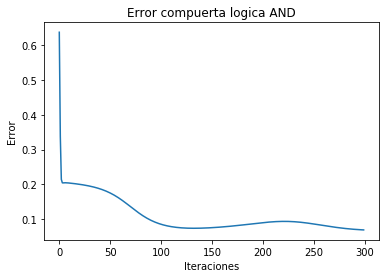

In [7]:
import matplotlib.pyplot as plt

plt.title("Error compuerta logica AND")
plt.xlabel("Iteraciones") 
plt.ylabel("Error")
plt.plot(np.arange(len(error_AND)), np.asarray(error_AND))

plt.show()

In [8]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

iris = load_iris()
entradas_iris, salidas_iris = np.asmatrix(iris.data), np.asmatrix(iris.target)
entradas_iris

matrix([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [9]:
salidas_iris

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2]])

In [10]:
#normalizando datos de entrada
entradas_iris = preprocessing.normalize(entradas_iris)

In [11]:
entradas_iris

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [12]:
# Convirtiendo salidas una matriz
salidas_iris = np.asmatrix(salidas_iris).T
salidas_iris

matrix([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],

In [13]:
# Convirtiendo a categorial data 0 = 100, 1 = 010, 2 = 001
enc = preprocessing.OneHotEncoder(n_values=3)
enc.fit(salidas_iris)
salidas_iris = np.asmatrix(enc.transform(salidas_iris).toarray().reshape(-1, 3))
salidas_iris

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [14]:
# 70% entrenamiento y 30% pruebas
x_train, x_test, y_train, y_test = train_test_split(entradas_iris, salidas_iris, test_size=0.3) 

x_train = np.asmatrix(x_train)
x_test = x_test
y_train = np.asmatrix(y_train)
y_test = y_test

In [15]:
w1_Iris, w2_Iris, error_Iris = entrenamiento(x_train, y_train, 30, 500, 0.1)

In [16]:
salida = prediccion(x_test, w1_Iris, w2_Iris)
salida

matrix([[0.85327032, 0.22679637, 0.00838193],
        [0.86776491, 0.21644515, 0.00756667],
        [0.02850286, 0.71073935, 0.29828398],
        [0.03537529, 0.68978723, 0.26220894],
        [0.00942723, 0.79222562, 0.49340683],
        [0.0132566 , 0.76707305, 0.42663504],
        [0.00427269, 0.84155472, 0.6426777 ],
        [0.05190558, 0.65507933, 0.20910473],
        [0.86499403, 0.21779911, 0.00769072],
        [0.86576317, 0.21784052, 0.00767776],
        [0.02776086, 0.71020752, 0.29962175],
        [0.03955589, 0.67743643, 0.24386217],
        [0.01396186, 0.76689479, 0.42362823],
        [0.01943059, 0.74057331, 0.36192648],
        [0.88590107, 0.20615423, 0.00673363],
        [0.01401578, 0.76428641, 0.41827323],
        [0.011286  , 0.77643595, 0.45302119],
        [0.04707511, 0.66451301, 0.22229396],
        [0.00705233, 0.81208699, 0.55088818],
        [0.04576804, 0.66671865, 0.22557465],
        [0.03683027, 0.68779055, 0.25795853],
        [0.87503926, 0.21251613, 0

In [17]:
c = 0
while(c < len(salida)):
    maximo  = max(salida[c, 0], salida[c, 1], salida[c, 2])
    if(salida[c, 0] == maximo):
        salida[c, 0] = 1
        salida[c, 1] = 0
        salida[c, 2] = 0
    elif(salida[c, 1] == maximo):
        salida[c, 0] = 0
        salida[c, 1] = 1
        salida[c, 2] = 0
    elif(salida[c, 2] == maximo):
        salida[c, 0] = 0
        salida[c, 1] = 0
        salida[c, 2] = 1
    c+=1

In [18]:
salida

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [19]:
y_test

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.]])

In [20]:
c = 0
aciertos = 0
while(c < len(salida)):
    maximo  = max(salida[c, 0], salida[c, 1], salida[c, 2])
    if((salida[c, 0] == y_test[c, 0]) and (salida[c, 1] == y_test[c, 1]) and (salida[c, 2] == y_test[c, 2])) :
        aciertos+=1
    c+=1
    
print(float(aciertos)/len(salida))

0.6888888888888889


In [21]:
def tanh_activation(x):
    return np.tanh(x)

def tanh_activation_der(x):
    return 1.0 - (np.tanh(x))**2

In [22]:
def prediccion(x, w1, w2):
    c1 = tanh_activation(x.dot(w1) + bias)
    return tanh_activation(c1.dot(w2) + bias)

def entrenamiento(entradas, salidas, neuronas, iteraciones, taza_aprendizaje):
    
    w1 = np.random.rand(entradas.shape[1], neuronas)
    w2 = np.random.rand(neuronas,salidas.shape[1])
    
    errores = []
    for iteracion in range(iteraciones):
        for entrada, salida in zip(entradas, salidas):
            
            #documentacion red neuronal
            #https://www.youtube.com/watch?v=262XJe2I2D0&t=40s
            
            #forward
            l0 = entrada
            l1 = tanh_activation(np.dot(l0, w1) + bias)
            l2 = tanh_activation(np.dot(l1, w2) + bias)
            
            #backpropagation
            l2_error = -2*(l2-salida)
            
            #calcular deltas
            l2_delta = np.multiply(l2_error, tanh_activation_der(l2.A1))
            l1_error = np.dot(l2_delta, w2.T)
            l1_delta = np.multiply(l1_error, tanh_activation_der(l1.A1))
            
            #actualizar pesos
            w2 = w2 + 0.3*np.dot(l1.T, l2_delta)
            w1 = w1 + 0.3*np.dot(l0.T, l1_delta)
            
        #Probando - calculando error
        errores.append(np.square(np.subtract(prediccion(entradas, w1, w2), salidas)).mean(axis=0).A1[0])

        if(np.square(np.subtract(prediccion(entradas, w1, w2), salidas)).mean(axis=0).A1[0] < 0.01):
            break

    return w1, w2, errores

In [23]:
w1_Iris, w2_Iris, error_Iris = entrenamiento(x_train, y_train, 30, 1000, 0.1)

In [24]:
salida = prediccion(x_test, w1_Iris, w2_Iris)
c = 0
while(c < len(salida)):
    maximo  = max(salida[c, 0], salida[c, 1], salida[c, 2])
    if(salida[c, 0] == maximo):
        salida[c, 0] = 1
        salida[c, 1] = 0
        salida[c, 2] = 0
    elif(salida[c, 1] == maximo):
        salida[c, 0] = 0
        salida[c, 1] = 1
        salida[c, 2] = 0
    elif(salida[c, 2] == maximo):
        salida[c, 0] = 0
        salida[c, 1] = 0
        salida[c, 2] = 1
    c+=1

c = 0
aciertos = 0
while(c < len(salida)):
    maximo  = max(salida[c, 0], salida[c, 1], salida[c, 2])
    if((salida[c, 0] == y_test[c, 0]) and (salida[c, 1] == y_test[c, 1]) and (salida[c, 2] == y_test[c, 2])) :
        aciertos+=1
    c+=1
    
print(float(aciertos)/len(salida))

0.8666666666666667
